## Introduction
This notebooks gives some additional information about the phyllotaxis trajectory to accompany the paper, which includes Figure 1 from the paper, and SI Figure 1 and 2 from the supplementary material. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pymerlin.trajectory import linear_phyllotaxis, piccini_phyllotaxis
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors
from matplotlib import cm
from helpers import *
from pymerlin.utils import *
%matplotlib inline

In [2]:
# Golden ratio
g = (1 + np.sqrt(5))/2

# Golden angle
ag = 2*np.pi/g**2

print("Golden ratio: {:.6f}\nGolden angle: {:.2f} deg".format(g, np.rad2deg(ag)))

Golden ratio: 1.618034
Golden angle: 137.51 deg


## Figure 1 - Trajectory subsampling
Below we plot the trajectory with different smoothing factors to show how that changes the trajectory. It is 
plotted as points to better illustrate how the spacing between points changes.

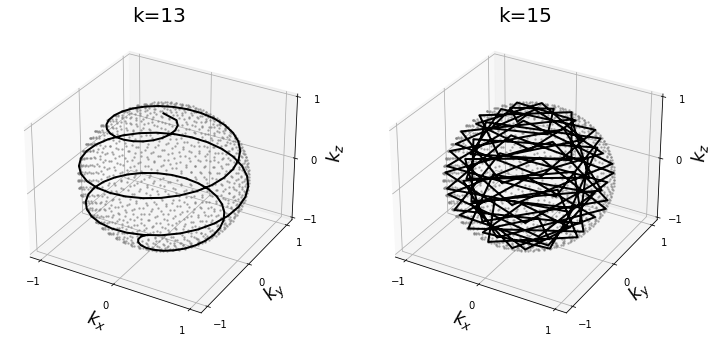

In [14]:
nspokes = 1300
n = np.arange(nspokes)

traj = linear_phyllotaxis(nspokes, nint=13, sf=7)

# Increment azimuthal angle by golden angle
phi = n*ag
# Produce a linear z gradient
z = 1 - 2*n/(nspokes-1)
theta = np.arccos(z)

# Convert to spherical coordinates
x = np.cos(phi)*np.sin(theta)
y = np.sin(phi)*np.sin(theta)

fig = plt.figure(figsize=(12,7))
for (i,ss) in enumerate([13,15]):
    ax = fig.add_subplot(1,2,i+1,projection='3d', facecolor='w')

    plt.plot(x,y,z, '.', alpha=0.5, markersize=3, color='gray')
    plt.plot(x[0::ss], y[0::ss], z[0::ss], color='k', linewidth=2)
    ax.set_xticks([-1,0,1])
    ax.set_yticks([-1,0,1])
    ax.set_zticks([-1,0,1])
    ax.set_xlabel(r'$k_x$', fontsize=18)
    ax.set_ylabel(r'$k_y$', fontsize=18)
    ax.set_zlabel(r'$k_z$', fontsize=18)
    plt.title('k={:d}'.format(ss), fontsize=20)
    
plt.savefig('Figure1A.png', dpi=300)
plt.show()

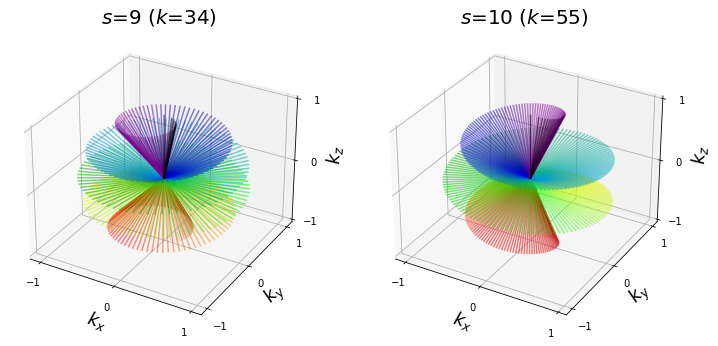

In [15]:
fig = plt.figure(figsize=(12,7))
sps = 384
for (i,sf) in enumerate([9,10]):
    traj = linear_phyllotaxis(n=sps, nint=1, sf=sf)
    ax = fig.add_subplot(1,2,i+1,projection='3d', facecolor='w')
    cm = plt.cm.nipy_spectral
    
    for k in list(range(sps))[::-1]:
        ax.plot([0, traj[k,0]], [0,traj[k,1]], [0,traj[k,2]], '-', alpha=0.5, color=cm(k/sps))
        
    ax.set_xticks([-1,0,1])
    ax.set_yticks([-1,0,1])
    ax.set_zticks([-1,0,1])
    ax.set_xlabel(r'$k_x$', fontsize=18)
    ax.set_ylabel(r'$k_y$', fontsize=18)
    ax.set_zlabel(r'$k_z$', fontsize=18)
    ax.set_title(r'$s$={} ($k$={})'.format(sf, fibonacci(sf)), fontsize=20)

plt.savefig("Figure1B.png",dpi=300)
plt.show()

## SI Figure 1 - Spoke step

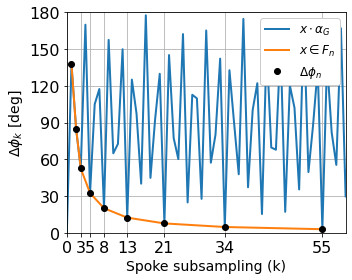

In [20]:
plt.figure(figsize=(5,4))
phi1 = np.mod(phi,2*np.pi)
mask = phi1>np.pi
phi1[mask] = -1*phi1[mask]+2*np.pi
phi1 *= 360/(2*np.pi)

fibnum = np.array([fibonacci(x) for x in range(2,11)])
plt.plot(n,phi1, label=r'$x\cdot \alpha_G$', color='C00', linewidth=2)
pred_diff = np.rad2deg(2*np.pi/g**(np.arange(2,11)))
plt.plot(fibnum, phi1[fibnum], '-', label=r'$x\in F_n$', color='C01', linewidth=2)
plt.plot(fibnum, pred_diff, 'ok', label=r'$\Delta \phi_n$')

plt.xlabel("Spoke subsampling (k)", fontsize=14)
plt.ylabel(r"$\Delta \phi_k$ [deg]", fontsize=14)
plt.legend(framealpha=1, loc='upper right', fontsize=12)
plt.axis([0,60,0,180])
plt.xticks([0,3,5,8,13,21,34,55], size=16)
plt.yticks(np.arange(0,181,30),size=16)
plt.grid()
plt.tight_layout()
plt.savefig('SI_Figure1.png', dpi=300)
plt.show()

## SI Figure 2 - Uniform sampling density
In this work, we wanted to achieve an isotropic field of view, for which the sampling density should be even throughout k-space. The formulation by Piccini et al results in lower sampling density around the poles in k-space, thus an non-isotropic field of view. This is illustrated through the figures below (Note, calculation of the voronoi diagram in 3D takes a while so be patient...)

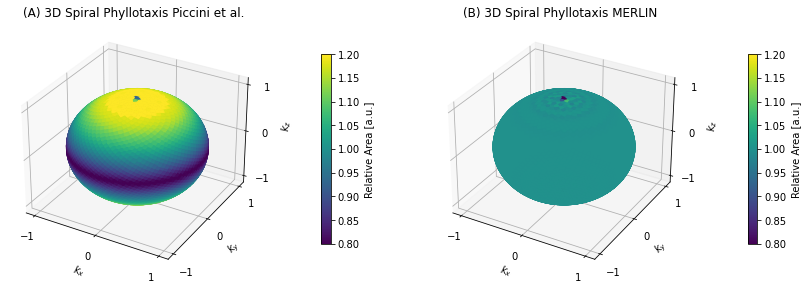

In [21]:
nint = 13
spi = 256
n = nint*spi
vmin=0.8
vmax=1.2
cmap='viridis'

fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(1,2,1, projection='3d')
traj_pic = piccini_phyllotaxis(n,nint=nint)
voronoi_3D(traj=traj_pic, vmin=vmin, vmax=vmax, cmap=cmap, ax=ax, title='(A) 3D Spiral Phyllotaxis Piccini et al.')

ax = fig.add_subplot(1,2,2, projection='3d')
traj_merlin = linear_phyllotaxis(n, nint, 7)
voronoi_3D(traj=traj_merlin, vmin=vmin, vmax=vmax, cmap=cmap, ax=ax, title='(B) 3D Spiral Phyllotaxis MERLIN')

plt.tight_layout()
plt.savefig('SI_Figure2.png', dpi=300)
plt.show()